In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data reading and information check

data = pd.read_csv('bestsellers with categories.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [3]:
# changing the types of the variables Name, Author and Genre to string type 

data[['Name', 'Author', 'Genre']] = data[['Name', 'Author', 'Genre']].astype('string')

# in case I'd like to consider just the first editions of each book, I would have done the following: 

# data.drop_duplicates(subset=['Name'], inplace=True, ignore_index=True) 

In [4]:
# basic descriptive measures

data.describe(include='all').round(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.00,550.00,550.00,550.00,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.62,11953.28,13.10,2014.00,NaN
std,NaN,NaN,0.23,11731.13,10.84,3.17,NaN
min,NaN,NaN,3.30,37.00,0.00,2009.00,NaN
25%,NaN,NaN,4.50,4058.00,7.00,2011.00,NaN
50%,NaN,NaN,4.70,8580.00,11.00,2014.00,NaN
75%,NaN,NaN,4.80,17253.25,16.00,2017.00,NaN


In [5]:
#  which are the first 10 most well rated books from 2019? (alphabetically sorted)

df1 = data.loc[data['Year'] == 2019].sort_values(by=['User Rating', 'Name'], ascending=(False, True)).head(10)
df1.reset_index(inplace=True, drop=True)
df1['Name']

0             Brown Bear, Brown Bear, What Do You See?
1    Dog Man: Brawl of the Wild: From the Creator o...
2    Dog Man: Fetch-22: From the Creator of Captain...
3    Dog Man: For Whom the Ball Rolls: From the Cre...
4    Harry Potter and the Goblet of Fire: The Illus...
5                            Oh, the Places You'll Go!
6               Strange Planet (Strange Planet Series)
7                          The Very Hungry Caterpillar
8                     The Wonderful Things You Will Be
9                               Unfreedom of the Press
Name: Name, dtype: string

In [6]:
# which are the first 10 most well rated fiction books? (alphabetically sorted)

df2 = data.loc[data['Genre'] == 'Fiction'].sort_values(by=['User Rating', 'Name', 'Year'], ascending=(False, True, True)).head(10)
df2.reset_index(inplace=True, drop=True)
df2['Name']

0             Brown Bear, Brown Bear, What Do You See?
1             Brown Bear, Brown Bear, What Do You See?
2    Dog Man and Cat Kid: From the Creator of Capta...
3    Dog Man: A Tale of Two Kitties: From the Creat...
4    Dog Man: Brawl of the Wild: From the Creator o...
5    Dog Man: Brawl of the Wild: From the Creator o...
6    Dog Man: Fetch-22: From the Creator of Captain...
7    Dog Man: For Whom the Ball Rolls: From the Cre...
8    Dog Man: Lord of the Fleas: From the Creator o...
9    Goodnight, Goodnight Construction Site (Hardco...
Name: Name, dtype: string

In [7]:
# which are the first 5 most well rated authors?
# for that, I am going to consider only the first editions of each book

df0 = data.drop_duplicates(subset=['Name'], ignore_index=True)
df3 = df0[['Author', 'User Rating']]
df3.sort_values(by=['User Rating', 'Author'], ascending=(False, True)).drop_duplicates(ignore_index=True).head(5)

,Author,User Rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Brandon Stanton,4.9
3,Chip Gaines,4.9
4,Dav Pilkey,4.9


In [8]:
# display the information of the book that has the most reviews

df4 = data.groupby(['Name', 'Reviews'], as_index=False).max().sort_values('Reviews', ascending=False).reset_index(drop=True)
df4.loc[0]

# df4.iat[0, 0] shows a specific value, only one 'cell' of the DataFrame

Name           Where the Crawdads Sing
Reviews                          87841
Author                     Delia Owens
User Rating                        4.8
Price                               15
Year                              2019
Genre                          Fiction
Name: 0, dtype: object

In [9]:
# what's the User Rating mean of J.K. Rowling's best sellers?

df5 = data.loc[data['Author'].str.contains('Rowling')].reset_index(drop=True).sort_values(by='Name')
media_avaliacoes = round(df5['User Rating'].mean(), 2)
media_avaliacoes

4.55

In [10]:
# create a column having the percentage of the rating in relation to the max score (5.0)

def rate(score):
    return score/5*100


data['Pass Rate'] = data['User Rating'].map(rate)

columns_names=['Name', 'Author', 'User Rating', 'Pass Rate', 'Reviews', 'Price', 'Year', 'Genre']
data = data.reindex(columns=columns_names)

df6 = data[['Name', 'Author', 'User Rating', 'Pass Rate']]
df6

,Name,Author,User Rating,Pass Rate
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,94.0
1,11/22/63: A Novel,Stephen King,4.6,92.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,94.0
3,1984 (Signet Classics),George Orwell,4.7,94.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,96.0
...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,98.0
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,94.0
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,94.0
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,94.0


<h3> Pearson's Correlation</h3>

Here, I am going to try to extract the Pearson's Correlation among the Price and the Genre, but since Genre is a string value instead of a numeric, I applied to it the numbers 0 and 1 (for Non-Fiction and Fiction respectively). 

<b>But is this a correct method to use?</b>

I'm open to comments that might help.

In [11]:
def gen(word):
    if word == 'Non Fiction':
        return 0
    else:
        return 1

    
corr_pear = data['Price'].corr(data['Genre'].map(gen))
corr_pear

# Therefore, it's possible to see that there's a negative correlation between the variables

-0.18276059688674628

<AxesSubplot:title={'center':'best sellings genres'}>

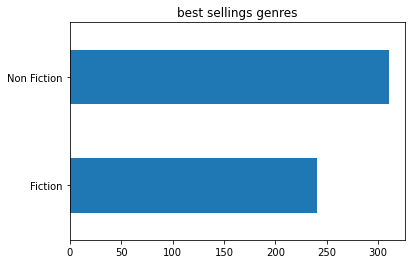

In [12]:
# Plot the amount of types of best sellings in a bar plot using pandas

data['Genre'].value_counts().sort_values().plot(kind='barh', title='best sellings genres')

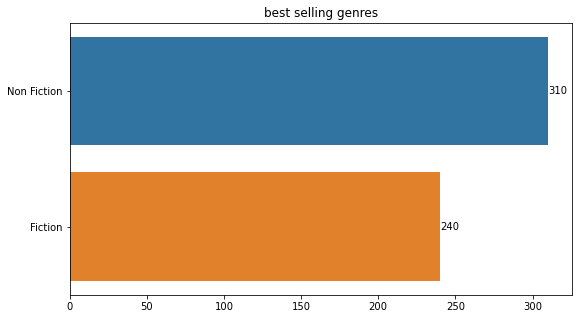

In [13]:
# using seaborn

genre_counts = data['Genre'].value_counts()
plt.figure(figsize=(9, 5))
ax0 = sns.barplot(x=genre_counts.values, y=genre_counts.index)
ax0.bar_label(ax0.containers[0])
plt.title('best selling genres')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

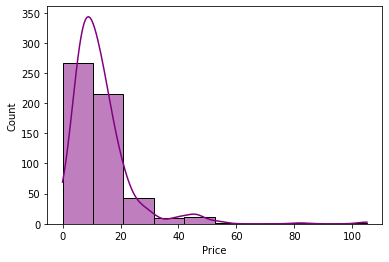

In [14]:
# create a histogram for the Price and User Rating variables

sns.histplot(data=data, x='Price', bins=10, kde=True, color='purple')

# Price variable has a strong right-asymmetry

<AxesSubplot:xlabel='User Rating', ylabel='Count'>

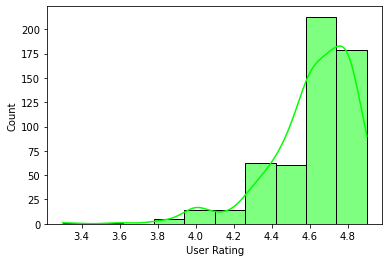

In [15]:
sns.histplot(data=data, x='User Rating', bins=10, kde=True, color='lime')

# User Rating variable has a left-asymmetry

<AxesSubplot:xlabel='Year', ylabel='Price'>

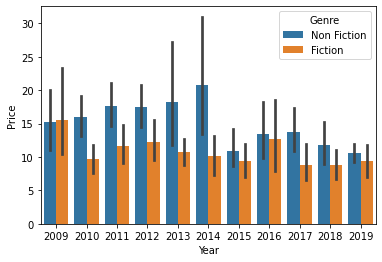

In [16]:
# bar plot showing prices along the years according to each genre

sns.barplot(data=data, x='Year', y='Price', hue='Genre')